In [1]:
# To use these packages, we need to import them first.

import pathlib           # Use the handy Python directory and path library
import math   as m       # The standard Python math library
import numpy  as np      # Numpy array library
import pandas as pd      # Pandas data table and time series library
import seaborn as sns
import datetime as dt  
import matplotlib.pyplot as plt # Used to plot graphs
%matplotlib inline

from matplotlib import interactive
interactive(True) 


input_dir = pathlib.Path('InputFolder_Assig')   # Our input files are here.

In [2]:
from scipy.stats import norm      # Import the Normal distribution library

In [3]:
# This is done to get the data from the CSV file.

call_data = pd.read_csv( input_dir / 'Midprice.csv', na_filter = False)
call_data

,Date,Open,Bid,Ask,Close,Adj Close,Volume
0,23/11/2018,174.940002,176.600006,172.100006,172.289993,169.739655,23624000
1,26/11/2018,174.240005,174.949997,170.259995,174.619995,172.035172,44998500
2,27/11/2018,171.509995,174.770004,170.880005,174.240005,171.660797,41387400
3,28/11/2018,176.729996,181.289993,174.929993,180.940002,178.261627,46062500
4,29/11/2018,182.660004,182.800003,177.699997,179.550003,176.892197,41770000
...,...,...,...,...,...,...,...
247,18/11/2019,265.799988,267.429993,264.230011,267.100006,267.100006,21675800
248,19/11/2019,267.899994,268.000000,265.390015,266.290009,266.290009,19041800
249,20/11/2019,265.540009,266.079987,260.399994,263.190002,263.190002,26558600
250,21/11/2019,263.690002,264.010010,261.179993,262.010010,262.010010,30324600


In [4]:
call_data.info() # review the data info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
Bid          252 non-null float64
Ask          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.9+ KB


In [5]:
# compute midprice using average of bid and ask column

call_data["Midprice"]= (call_data["Bid"] + call_data["Ask"])/2

In [6]:
# Return call_data and all headers

call_data

,Date,Open,Bid,Ask,Close,Adj Close,Volume,Midprice
0,23/11/2018,174.940002,176.600006,172.100006,172.289993,169.739655,23624000,174.350006
1,26/11/2018,174.240005,174.949997,170.259995,174.619995,172.035172,44998500,172.604996
2,27/11/2018,171.509995,174.770004,170.880005,174.240005,171.660797,41387400,172.825005
3,28/11/2018,176.729996,181.289993,174.929993,180.940002,178.261627,46062500,178.109993
4,29/11/2018,182.660004,182.800003,177.699997,179.550003,176.892197,41770000,180.250000
...,...,...,...,...,...,...,...,...
247,18/11/2019,265.799988,267.429993,264.230011,267.100006,267.100006,21675800,265.830002
248,19/11/2019,267.899994,268.000000,265.390015,266.290009,266.290009,19041800,266.695007
249,20/11/2019,265.540009,266.079987,260.399994,263.190002,263.190002,26558600,263.239990
250,21/11/2019,263.690002,264.010010,261.179993,262.010010,262.010010,30324600,262.595002


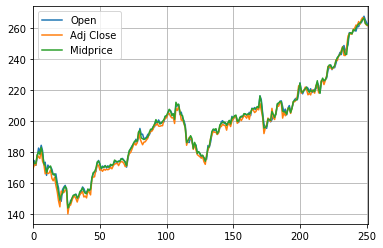

<Figure size 3600x3600 with 0 Axes>

In [7]:
#Visualise the Open,Adj Close and Midprice 

call_data[['Open','Adj Close','Midprice']].plot(kind='line')
plt.grid(True)
plt.figure(figsize=(50,50))
plt.show()

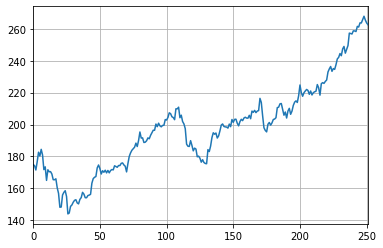

In [8]:
# Plot the open prices 
call_data['Open'].plot(grid=True)

# Show the plot
plt.show()

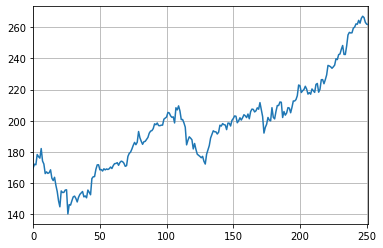

In [9]:
# Plot the Adj Close
call_data['Adj Close'].plot(grid=True)

# Show the plot
plt.show()

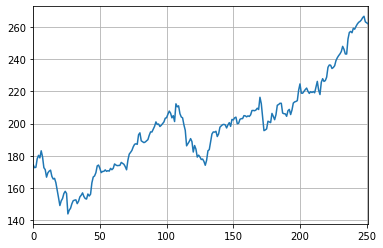

In [10]:
# Plot the Midprices
call_data['Midprice'].plot(grid=True)

# Show the plot
plt.show()

In [11]:
# compute 1 day scenarios(absolute) use (t1-t0)
call_data.fillna(0, inplace=True)

call_data["1_day_Scenarios"] =  call_data['Adj Close'].shift(-1)- call_data['Adj Close']

In [12]:
call_data

,Date,Open,Bid,Ask,Close,Adj Close,Volume,Midprice,1_day_Scenarios
0,23/11/2018,174.940002,176.600006,172.100006,172.289993,169.739655,23624000,174.350006,2.295517
1,26/11/2018,174.240005,174.949997,170.259995,174.619995,172.035172,44998500,172.604996,-0.374375
2,27/11/2018,171.509995,174.770004,170.880005,174.240005,171.660797,41387400,172.825005,6.600830
3,28/11/2018,176.729996,181.289993,174.929993,180.940002,178.261627,46062500,178.109993,-1.369430
4,29/11/2018,182.660004,182.800003,177.699997,179.550003,176.892197,41770000,180.250000,-0.955643
...,...,...,...,...,...,...,...,...,...
247,18/11/2019,265.799988,267.429993,264.230011,267.100006,267.100006,21675800,265.830002,-0.809997
248,19/11/2019,267.899994,268.000000,265.390015,266.290009,266.290009,19041800,266.695007,-3.100007
249,20/11/2019,265.540009,266.079987,260.399994,263.190002,263.190002,26558600,263.239990,-1.179992
250,21/11/2019,263.690002,264.010010,261.179993,262.010010,262.010010,30324600,262.595002,-0.230011


In [13]:
call_data.to_csv('EQ scenarios.csv')